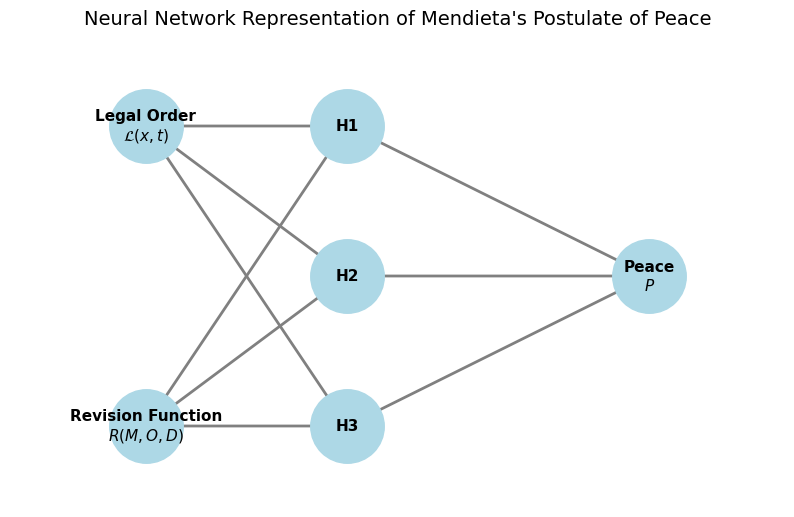

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Input layer
inputs = {
    "L": "Legal Order\n$\\mathcal{L}(x, t)$",
    "R": "Revision Function\n$R(M, O, D)$"
}

# Hidden layer
hidden = {
    "H1": "H1",
    "H2": "H2",
    "H3": "H3"
}

# Output
output = {
    "P": "Peace\n$P$"
}

# Add nodes and edges
G.add_nodes_from(inputs.keys())
G.add_nodes_from(hidden.keys())
G.add_nodes_from(output.keys())

for i in inputs.keys():
    for h in hidden.keys():
        G.add_edge(i, h)

for h in hidden.keys():
    G.add_edge(h, "P")

# Node positions
pos = {
    "L": (-1, 1),
    "R": (-1, -1),
    "H1": (0, 1),
    "H2": (0, 0),
    "H3": (0, -1),
    "P": (1.5, 0)
}

# Combine labels
labels = {**inputs, **hidden, **output}

# Draw and save
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2800)
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowstyle='-|>', arrowsize=16, width=2)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=11, font_weight='bold')

plt.title("Neural Network Representation of Mendieta's Postulate of Peace", fontsize=14, pad=15)
plt.axis('off')
plt.margins(x=0.2, y=0.2)

# ✅ Save as PNG
plt.savefig("mendieta_ann.png", dpi=300, bbox_inches='tight')  # Save with high resolution

plt.show()


C:\Users\Superuser\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 120027 (\N{MATHEMATICAL BOLD SCRIPT CAPITAL L}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


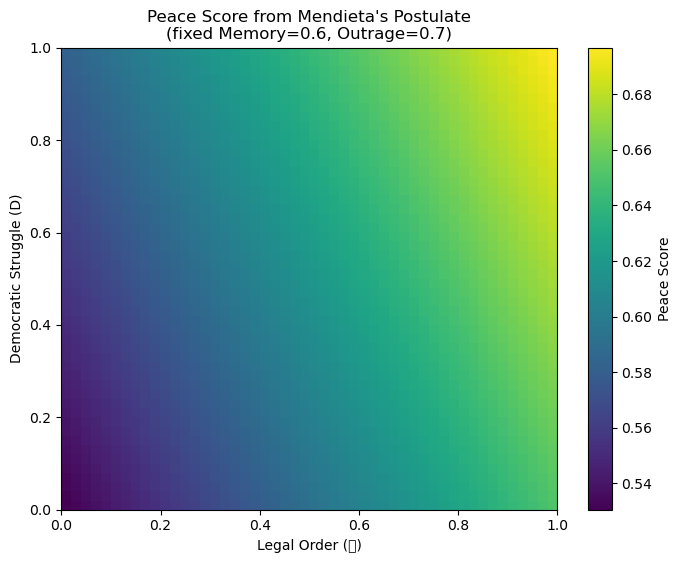

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Peace model: legal_order and revision_function → peace
def compute_peace(legal_order, collective_memory, moral_outrage, democratic_struggle):
    # Compute revision function R(M, O, D)
    weights_r = np.array([0.3, 0.4, 0.3])
    inputs_r = np.array([collective_memory, moral_outrage, democratic_struggle])
    revision_function = np.dot(weights_r, inputs_r)
    
    # Peace equation: sigmoid(w1*L + w2*R + b)
    w1 = 0.5
    w2 = 0.7
    b = -0.2
    return sigmoid(w1 * legal_order + w2 * revision_function + b)

# Create input ranges
legal_orders = np.linspace(0, 1, 50)
democratic_struggles = np.linspace(0, 1, 50)

# Fix memory and outrage for this visualization
collective_memory = 0.6
moral_outrage = 0.7

# Compute peace values
peace_matrix = np.zeros((len(legal_orders), len(democratic_struggles)))

for i, lo in enumerate(legal_orders):
    for j, ds in enumerate(democratic_struggles):
        peace_matrix[j, i] = compute_peace(
            legal_order=lo,
            collective_memory=collective_memory,
            moral_outrage=moral_outrage,
            democratic_struggle=ds
        )

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(peace_matrix, origin='lower', aspect='auto',
           extent=[0, 1, 0, 1], cmap='viridis')
plt.colorbar(label='Peace Score')
plt.xlabel('Legal Order (𝓛)')
plt.ylabel('Democratic Struggle (D)')
plt.title("Peace Score from Mendieta's Postulate\n(fixed Memory=0.6, Outrage=0.7)")
plt.grid(False)
plt.show()


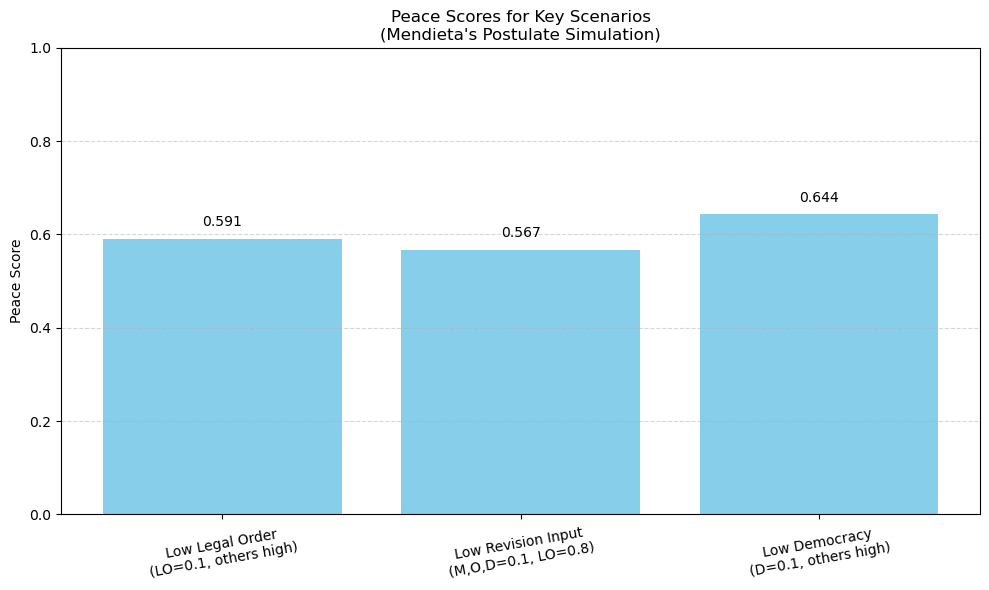

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Peace model from Mendieta's postulate
def compute_peace(legal_order, collective_memory, moral_outrage, democratic_struggle):
    weights_r = np.array([0.3, 0.4, 0.3])
    inputs_r = np.array([collective_memory, moral_outrage, democratic_struggle])
    revision_function = np.dot(weights_r, inputs_r)
    
    w1 = 0.5
    w2 = 0.7
    b = -0.2
    return sigmoid(w1 * legal_order + w2 * revision_function + b)

# Scenario (a): Low Legal Order
peace_a = compute_peace(
    legal_order=0.1, 
    collective_memory=0.7, 
    moral_outrage=0.8, 
    democratic_struggle=0.7
)

# Scenario (b): Low Revision Function (via low M, O, D)
peace_b = compute_peace(
    legal_order=0.8, 
    collective_memory=0.1, 
    moral_outrage=0.1, 
    democratic_struggle=0.1
)

# Scenario (c): Low Democratic Struggle
peace_c = compute_peace(
    legal_order=0.8, 
    collective_memory=0.7, 
    moral_outrage=0.8, 
    democratic_struggle=0.1
)

# Bar chart setup
labels = [
    "Low Legal Order\n(LO=0.1, others high)",
    "Low Revision Input\n(M,O,D=0.1, LO=0.8)",
    "Low Democracy\n(D=0.1, others high)"
]
scores = [peace_a, peace_b, peace_c]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, scores, color='skyblue')
plt.ylim(0, 1)
plt.ylabel("Peace Score")
plt.title("Peace Scores for Key Scenarios\n(Mendieta's Postulate Simulation)")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add values above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02,
             f"{height:.3f}", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=10)
plt.tight_layout()
plt.show()


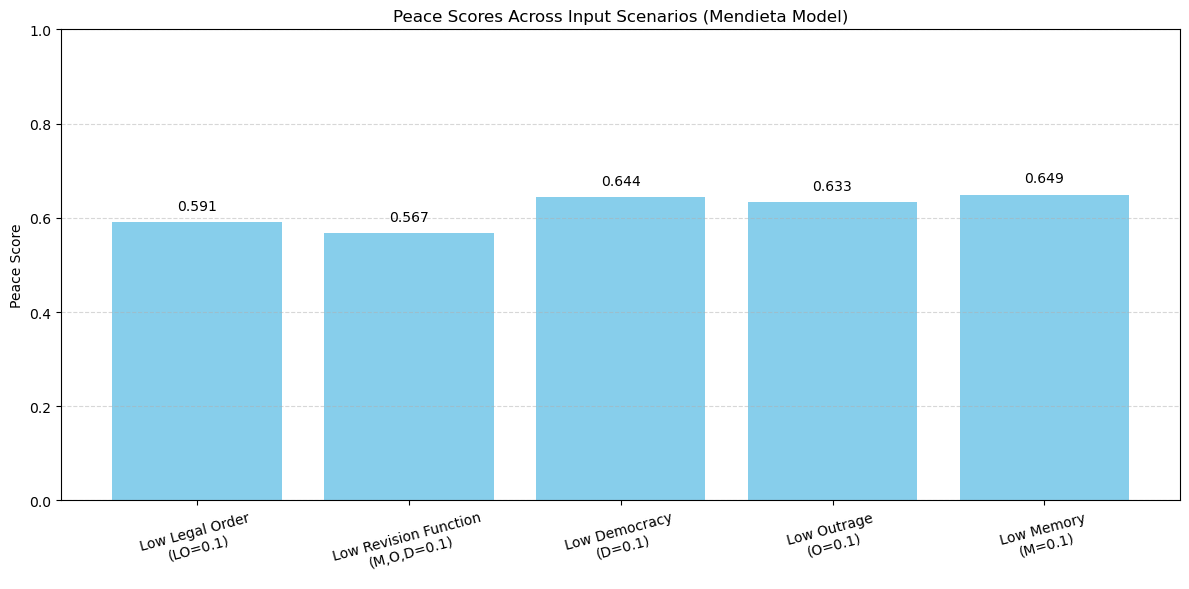

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Peace model from Mendieta's postulate
def compute_peace(legal_order, collective_memory, moral_outrage, democratic_struggle):
    weights_r = np.array([0.3, 0.4, 0.3])  # weights for M, O, D
    inputs_r = np.array([collective_memory, moral_outrage, democratic_struggle])
    revision_function = np.dot(weights_r, inputs_r)
    
    w1 = 0.5  # weight for legal order
    w2 = 0.7  # weight for revision function
    b = -0.2  # bias
    return sigmoid(w1 * legal_order + w2 * revision_function + b)

# Define simulation scenarios
scenarios = {
    "Low Legal Order\n(LO=0.1)": (0.1, 0.7, 0.8, 0.7),
    "Low Revision Function\n(M,O,D=0.1)": (0.8, 0.1, 0.1, 0.1),
    "Low Democracy\n(D=0.1)": (0.8, 0.7, 0.8, 0.1),
    "Low Outrage\n(O=0.1)": (0.8, 0.7, 0.1, 0.8),
    "Low Memory\n(M=0.1)": (0.8, 0.1, 0.8, 0.8)
}

# Compute peace scores for each scenario
labels = []
scores = []

for label, (lo, m, o, d) in scenarios.items():
    labels.append(label)
    scores.append(compute_peace(lo, m, o, d))

# Plot bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, scores, color='skyblue')
plt.ylim(0, 1)
plt.ylabel("Peace Score")
plt.title("Peace Scores Across Input Scenarios (Mendieta Model)")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate scores on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02,
             f"{height:.3f}", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


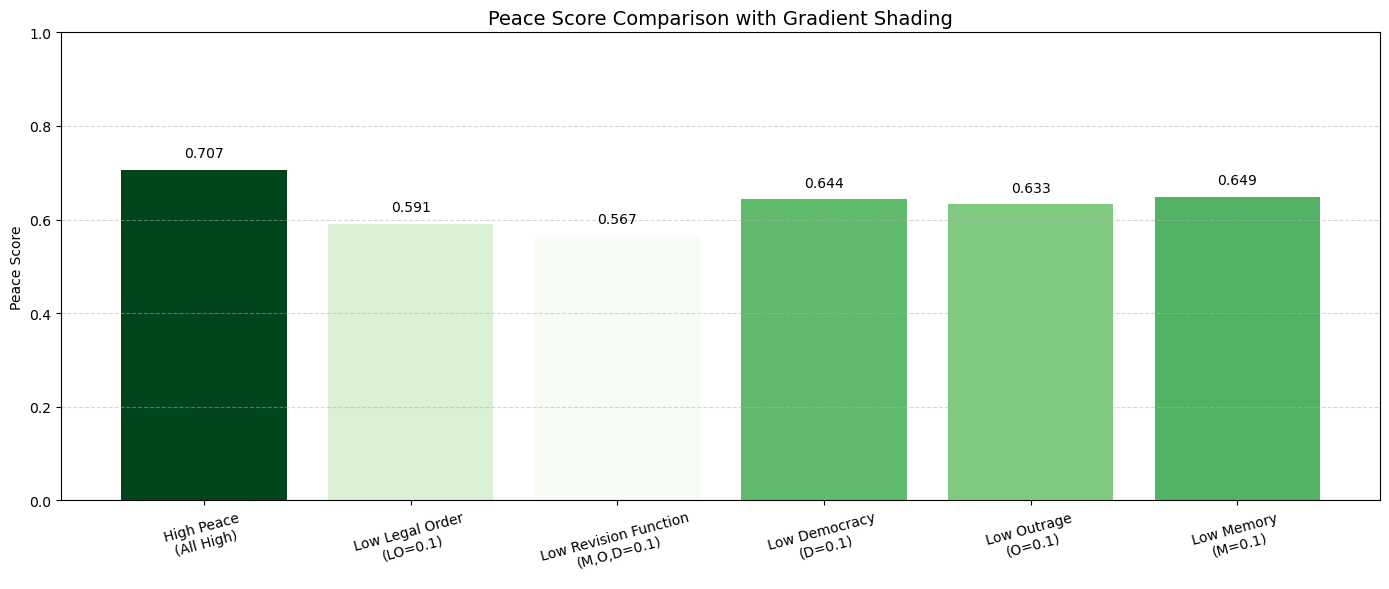

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Mendieta peace model
def compute_peace(legal_order, collective_memory, moral_outrage, democratic_struggle):
    weights_r = np.array([0.3, 0.4, 0.3])
    inputs_r = np.array([collective_memory, moral_outrage, democratic_struggle])
    revision_function = np.dot(weights_r, inputs_r)

    w1 = 0.5
    w2 = 0.7
    b = -0.2
    return sigmoid(w1 * legal_order + w2 * revision_function + b)

# Define scenarios
scenarios = {
    "High Peace\n(All High)": (0.9, 0.9, 0.9, 0.9),
    "Low Legal Order\n(LO=0.1)": (0.1, 0.7, 0.8, 0.7),
    "Low Revision Function\n(M,O,D=0.1)": (0.8, 0.1, 0.1, 0.1),
    "Low Democracy\n(D=0.1)": (0.8, 0.7, 0.8, 0.1),
    "Low Outrage\n(O=0.1)": (0.8, 0.7, 0.1, 0.8),
    "Low Memory\n(M=0.1)": (0.8, 0.1, 0.8, 0.8)
}

# Compute peace scores
labels = []
scores = []

for label, (lo, m, o, d) in scenarios.items():
    labels.append(label)
    scores.append(compute_peace(lo, m, o, d))

# Normalize scores for colormap
scores_array = np.array(scores)
normalized_scores = (scores_array - scores_array.min()) / (scores_array.max() - scores_array.min())
colors = cm.Greens(normalized_scores)

# Plot the bar chart with gradient
plt.figure(figsize=(14, 6))
bars = plt.bar(labels, scores, color=colors)
plt.ylim(0, 1)
plt.ylabel("Peace Score")
plt.title("Peace Score Comparison with Gradient Shading", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add score annotations
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
             f"{score:.3f}", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=15)
plt.tight_layout()

# ✅ Save as PNG
plt.savefig("peace_score_comparison_shaded.png", dpi=300, bbox_inches='tight')
plt.show()


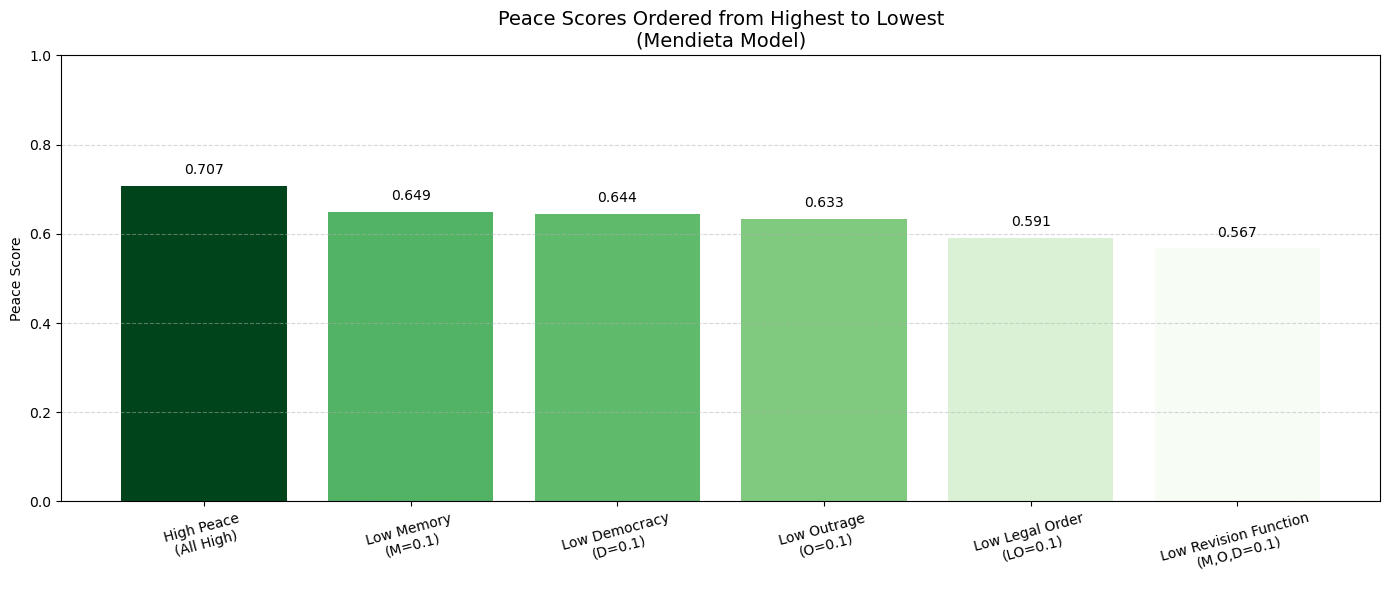

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Sigmoid activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Mendieta peace model function
def compute_peace(legal_order, collective_memory, moral_outrage, democratic_struggle):
    weights_r = np.array([0.3, 0.4, 0.3])  # weights for M, O, D
    inputs_r = np.array([collective_memory, moral_outrage, democratic_struggle])
    revision_function = np.dot(weights_r, inputs_r)
    
    w1 = 0.5  # weight for legal order
    w2 = 0.7  # weight for revision function
    b = -0.2  # bias term
    return sigmoid(w1 * legal_order + w2 * revision_function + b)

# Define input scenarios
scenarios = {
    "High Peace\n(All High)": (0.9, 0.9, 0.9, 0.9),
    "Low Legal Order\n(LO=0.1)": (0.1, 0.7, 0.8, 0.7),
    "Low Revision Function\n(M,O,D=0.1)": (0.8, 0.1, 0.1, 0.1),
    "Low Democracy\n(D=0.1)": (0.8, 0.7, 0.8, 0.1),
    "Low Outrage\n(O=0.1)": (0.8, 0.7, 0.1, 0.8),
    "Low Memory\n(M=0.1)": (0.8, 0.1, 0.8, 0.8)
}

# Compute peace scores and store with labels
computed = []
for label, (lo, m, o, d) in scenarios.items():
    score = compute_peace(lo, m, o, d)
    computed.append((label, score))

# Sort from highest to lowest peace score
sorted_computed = sorted(computed, key=lambda x: x[1], reverse=True)
labels, scores = zip(*sorted_computed)

# Normalize scores for shading
scores_array = np.array(scores)
normalized_scores = (scores_array - scores_array.min()) / (scores_array.max() - scores_array.min())
colors = cm.Greens(normalized_scores)

# Plot chart
plt.figure(figsize=(14, 6))
bars = plt.bar(labels, scores, color=colors)
plt.ylim(0, 1)
plt.ylabel("Peace Score")
plt.title("Peace Scores Ordered from Highest to Lowest\n(Mendieta Model)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate each bar with score
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
             f"{score:.3f}", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=15)
plt.tight_layout()

# ✅ Save to PNG
plt.savefig("peace_score_ordered_shaded.png", dpi=300, bbox_inches='tight')
plt.show()


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# --- Load the dataset (if it's already in a DataFrame called df, skip this) ---
df = pd.read_csv("C:/Users/Superuser/Downloads/Simulated_Peace_Dataset.csv")

# --- Feature Selection ---
features = ["LegalOrder_Spatial", "LegalOrder_Temporal", "Memory", "Outrage", "Democracy"]
target = "PeaceScore"

X = df[features].values
y = df[target].values.reshape(-1, 1)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Normalize the features ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Convert to PyTorch tensors ---
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# --- Neural Network Model ---
class PeaceNet(nn.Module):
    def __init__(self):
        super(PeaceNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(5, 16),      # Input layer (5 features)
            nn.ReLU(),
            nn.Linear(16, 8),      # Hidden layer
            nn.ReLU(),
            nn.Linear(8, 1),       # Output layer
            nn.Sigmoid()           # Because peace score is between 0 and 1
        )
        
    def forward(self, x):
        return self.model(x)

# --- Instantiate model, define loss and optimizer ---
model = PeaceNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# --- Training loop ---
n_epochs = 200
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}")

# --- Evaluation ---
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f"\nTest Loss (MSE): {test_loss.item():.4f}")

# Optional: Convert predictions to numpy
predicted_peace = predictions.numpy()


Epoch [20/200], Loss: 0.0048
Epoch [40/200], Loss: 0.0025
Epoch [60/200], Loss: 0.0020
Epoch [80/200], Loss: 0.0018
Epoch [100/200], Loss: 0.0017
Epoch [120/200], Loss: 0.0016
Epoch [140/200], Loss: 0.0015
Epoch [160/200], Loss: 0.0015
Epoch [180/200], Loss: 0.0015
Epoch [200/200], Loss: 0.0014

Test Loss (MSE): 0.0020


In [8]:
df

,LegalOrder_Spatial,LegalOrder_Temporal,Memory,Outrage,Democracy,RevisionFunction,LegalOrderFunction,PeaceScore
0,0.374540,0.698162,0.185133,0.519082,0.261706,0.334346,0.528101,0.466537
1,0.950714,0.536096,0.541901,0.479182,0.246979,0.466869,0.722984,0.662435
2,0.731994,0.309528,0.872946,0.025642,0.906255,0.656528,0.606465,0.711129
3,0.598658,0.813795,0.732225,0.341248,0.249546,0.474607,0.729078,0.671048
4,0.156019,0.684731,0.806561,0.380196,0.271950,0.508401,0.329339,0.452358
...,...,...,...,...,...,...,...,...
495,0.353352,0.091582,0.668213,0.656955,0.492325,0.624040,0.236816,0.459985
496,0.583656,0.917314,0.619490,0.956615,0.577279,0.732948,0.773900,0.866870
497,0.077735,0.136819,0.463494,0.068958,0.865577,0.489358,0.046054,0.272213
498,0.974395,0.950237,0.379786,0.057055,0.980739,0.467050,0.923506,0.781543


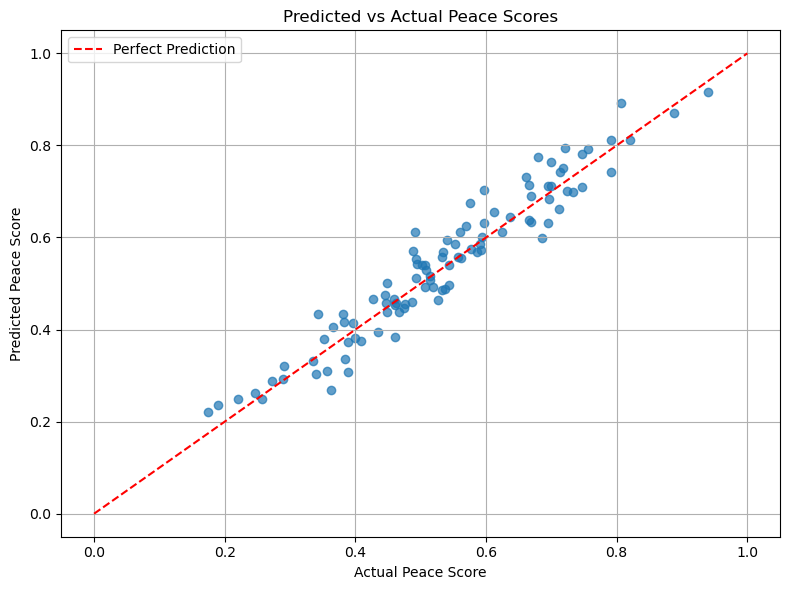

In [9]:
import matplotlib.pyplot as plt

# Convert tensors to numpy if not already done
y_test_np = y_test_tensor.numpy()
predicted_np = predictions.numpy()

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, predicted_np, alpha=0.7)
plt.plot([0, 1], [0, 1], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Peace Score")
plt.ylabel("Predicted Peace Score")
plt.title("Predicted vs Actual Peace Scores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
from sklearn.metrics import r2_score

# Calculate R² score
r2 = r2_score(y_test_np, predicted_np)
print(f"R² Score: {r2:.4f}")


R² Score: 0.9174


In [28]:
import ipywidgets

In [38]:
import streamlit as st
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Simulate data
np.random.seed(42)
n = 500
df = pd.DataFrame({
    "LegalOrder_Spatial": np.random.rand(n),
    "LegalOrder_Temporal": np.random.rand(n),
    "Memory": np.random.rand(n),
    "Outrage": np.random.rand(n),
    "Democracy": np.random.rand(n)
})
df["RevisionFunction"] = 0.4 * df["Memory"] + 0.3 * df["Outrage"] + 0.3 * df["Democracy"] + np.random.normal(0, 0.05, n)
df["LegalOrderFunction"] = 0.6 * df["LegalOrder_Spatial"] + 0.4 * df["LegalOrder_Temporal"] + np.random.normal(0, 0.05, n)
df["PeaceScore"] = (
    0.5 * df["LegalOrderFunction"] +
    0.5 * df["RevisionFunction"] +
    0.2 * df["LegalOrderFunction"] * df["RevisionFunction"]
).clip(0, 1)

# Train simple NN
features = ["LegalOrder_Spatial", "LegalOrder_Temporal", "Memory", "Outrage", "Democracy"]
X = df[features].values
y = df["PeaceScore"].values.reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

class PeaceNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(5, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)

model = PeaceNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()
for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    loss = loss_fn(model(X_tensor), y_tensor)
    loss.backward()
    optimizer.step()

# Streamlit interface
st.title("🕊️ Peace Score Simulator")
st.sidebar.markdown("Adjust the input values to see the predicted Peace Score.")

inputs = {
    "LegalOrder_Spatial": st.sidebar.slider("Legal Order (Spatial)", 0.0, 1.0, 0.5, 0.01),
    "LegalOrder_Temporal": st.sidebar.slider("Legal Order (Temporal)", 0.0, 1.0, 0.5, 0.01),
    "Memory": st.sidebar.slider("Collective Memory", 0.0, 1.0, 0.5, 0.01),
    "Outrage": st.sidebar.slider("Moral Outrage", 0.0, 1.0, 0.5, 0.01),
    "Democracy": st.sidebar.slider("Democratic Struggle", 0.0, 1.0, 0.5, 0.01),
}

input_array = np.array([list(inputs.values())])
input_scaled = scaler.transform(input_array)
input_tensor = torch.tensor(input_scaled, dtype=torch.float32)

model.eval()
with torch.no_grad():
    score = model(input_tensor).item()

st.metric("Predicted Peace Score", f"{score:.3f}")
st.bar_chart(pd.DataFrame({"Peace Score": [score]}, index=["Predicted"]))


2025-05-07 19:36:27.205 
  command:

    streamlit run C:\Users\Superuser\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()